<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S13/YoloV3-Doremon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Gilf641/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 216, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 372 (delta 40), reused 189 (delta 18), pack-reused 156
Receiving objects: 100% (372/372), 13.93 MiB | 7.49 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.1+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [4]:
ls

gdrive/  sample_data/  YoloV3/


In [5]:
cd YoloV3/

/content/YoloV3


In [6]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png


In [7]:
! mkdir weights 
!cd weights/
! wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-01 07:09:25--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights        1%[                    ]   4.21M   131KB/s    eta 19m 20s

KeyboardInterrupt: ignored

In [8]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

2020-07-01 07:10:14.211113: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
batch=64
subdivisions=16
width=608
height=608
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1
learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activati

In [9]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 10 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=10, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

2020-07-01 07:11:33.118577: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
batch=64
subdivisions=16
width=608
height=608
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1
learning_rate=0.001
burn_in=100
max_batches = 5000
policy=steps
steps=4000,4500
scales=.1,.1
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

batch=64
subdivisions=16
width=608
height=608
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1
learning_rate=0.001
burn_in=100
max_batches = 5000
policy=steps
steps=4000,4500
scales=.1,.1
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky
from=-3
activation=linear
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky
batch_nor

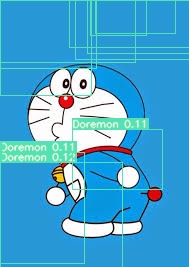

In [13]:
Image(filename='out_out/img001.jpg', width=600)

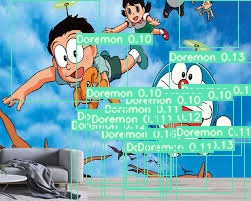

In [14]:
Image(filename='out_out/img005.jpg', width=600)

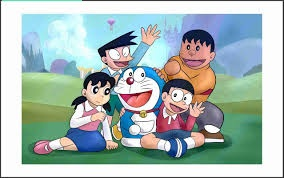

In [15]:
Image(filename='out_out/img003.jpg', width=600)

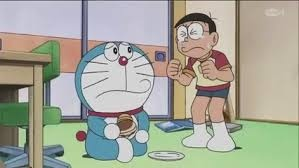

In [16]:
Image(filename='out_out/img009.jpg', width=600)